In [6]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt



timestamps, windspeeds = np.loadtxt("./winddata.dat", usecols=(0,1), unpack=True)

first four moments: [0.09819033945642662, 0.0014063915446366625, 3.219116058061687e-05, 5.877283395296137e-06]


### Calculating the first four moments

In [ ]:
mean = np.sum(windspeeds)/len(windspeeds)
centered_series = windspeeds - mean
moments = [mean]
for momentvector in [2,3,4]:
    moments.append(np.sum(centered_series**momentvector) / len(windspeeds))    
print("first four moments:", moments)

### The first four moments calculated with the python routine

In [17]:
mean = np.mean(windspeeds)
std = np.std(windspeeds)
skewness = sp.stats.skew(windspeeds)
kurtosis = sp.stats.kurtosis(windspeeds)
print("Numpy mean", mean)
print("Numpy standard deviation", std)
print("Scipy  skewness", skewness)
print("Scipy kurtosis", kurtosis)
computed_moments = [mean, std, skewness, kurtosis]
print("The first four moments are:", computed_moments)

Numpy mean 0.09819033945642662
Numpy standard deviation 0.03750188721433446
Scipy  skewness 0.6103476326434055
Scipy kurtosis -0.028579338030887858
The first four moments are: [0.09819033945642662, 0.03750188721433446, 0.6103476326434055, -0.028579338030887858]


### Corrections using the moments

In [22]:
# mean is the same
final_std = np.sqrt(moments[1])
final_skew = moments[2]/(final_std**3)
final_kurtosis = moments[3]/(final_std**4) - 3
print("The second moment (standard deviation):", final_std)
print("The third moment (skewness):", final_skew)
print("The fourth moment (kurtosis):", final_kurtosis)


The second moment (standard deviation): 0.03750188721433446
The third moment (skewness): 0.6103476326434056
The fourth moment (kurtosis): -0.028579338030886525


#### Task 2 - Histogram of wind speed

(array([7.960e+02, 2.026e+03, 2.287e+03, 4.986e+03, 4.363e+03, 6.561e+03,
        6.279e+03, 3.992e+03, 5.748e+03, 4.869e+03, 3.747e+03, 3.984e+03,
        1.964e+03, 2.250e+03, 1.392e+03, 1.329e+03, 1.329e+03, 7.960e+02,
        7.750e+02, 3.920e+02, 2.540e+02, 1.420e+02, 3.200e+01, 2.300e+01,
        4.000e+00]),
 array([0.02655949, 0.03526957, 0.04397965, 0.05268973, 0.0613998 ,
        0.07010988, 0.07881996, 0.08753004, 0.09624012, 0.1049502 ,
        0.11366028, 0.12237036, 0.13108043, 0.13979051, 0.14850059,
        0.15721067, 0.16592075, 0.17463083, 0.18334091, 0.19205099,
        0.20076106, 0.20947114, 0.21818122, 0.2268913 , 0.23560138,
        0.24431146]),
 <BarContainer object of 25 artists>)

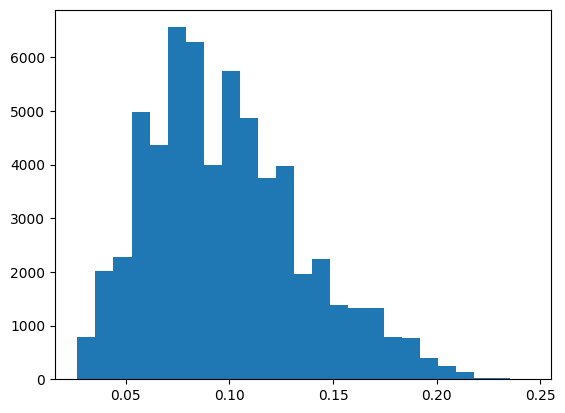

In [23]:
# Alternative 1
bins = 25
plt.hist(windspeeds, bins=bins)

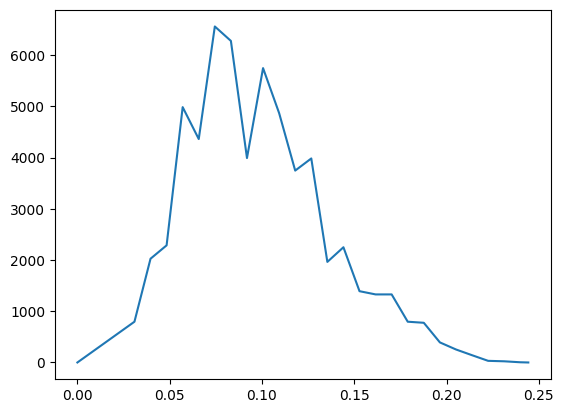

In [24]:
# Alternative 2
hist_values, hist_bin_edges = np.histogram(windspeeds, bins=bins)
hist_bin_midpoints = np.zeros(len(hist_values)+2)
new_hist_values = np.zeros(len(hist_values)+2)

for i in range(len(hist_values)):
    hist_bin_midpoints[i+1] = (hist_bin_edges[i] + hist_bin_edges[i+1])/2
    new_hist_values[i+1] = hist_values[i]

hist_bin_midpoints[len(hist_values)+1] = hist_bin_edges[len(hist_values)] 
new_hist_values[len(hist_values)+1] = 0

plt.plot(hist_bin_midpoints, new_hist_values)

#### Task 3 

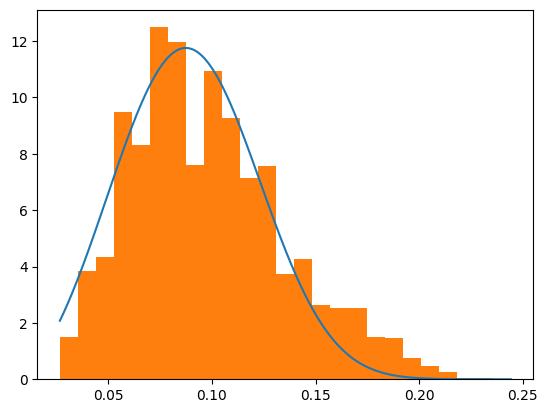

In [65]:
def weibull(v, k, l): # k is the shape, and l is the scale
    return (k/l) * ((v/l)**(k-1)) * np.exp(-(v/l)**k)

dataset = np.array([timestamps, windspeeds])
v = np.linspace(windspeeds.min(), windspeeds.max(), 1000)
plt.plot(v, weibull(v, 3, 0.1))
plt.hist(windspeeds, bins=25, density=True)
plt.show()
